In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from acoular import MicGeom
import math

C = 343 # for a better representation in figure
f = 4000
lmbda = C / f

# mg.mpos is an ndarray!!!
mg = MicGeom( from_file='array_9.xml' )
N = 9
n = np.arange(0,N,1).reshape([-1,1]) # N array from 0 to N-1
mic_pos = []
for i in n:
    mic_pos.append(mg.mpos[:,int(i)])

print(len(mic_pos))

9


In [2]:
# gen sig

# wrap this into a function!!!
noise_coord = [4, 2, 0.5]
r_0p = math.dist(mic_pos[0], noise_coord)
r_mp = []
x = []
for i in n:
    r_ip = math.dist(mic_pos[int(i)], noise_coord)
    delta_r_mp = r_0p - r_ip
    x_i = r_0p / r_ip * np.exp(-1 * 1j * 2 * np.pi * delta_r_mp / lmbda)
    r_mp.append(r_ip)
    x.append(x_i)
Rx = np.mat(1000 * np.dot(x, np.transpose(np.conj(x))) + 1 * np.eye(N)) # CSM


In [3]:
from acoular import RectGrid
rg = RectGrid( x_min=-0.2, x_max=4,
                       y_min=-0.2, y_max=4,
                       z=0.5, increment=0.05 )
print(rg.gpos[:,0])

[-0.2 -0.2  0.5]


In [8]:
look_coord = [0, 2, 0.5]
r_0q = math.dist(mic_pos[0], look_coord)
r_mq = []
a_look = []
for i in n:
    r_iq = math.dist(mic_pos[int(i)], look_coord)
    delta_r_mq = r_0q - r_iq
    a_i = r_0q / r_iq * np.exp(-1 * 1j * 2 * np.pi * delta_r_mq / lmbda)
    r_mq.append(r_iq)
    a_look.append(a_i)
a_look = np.mat(a_look).T

w = Rx.I * a_look / (a_look.H * Rx.I * a_look) # Rx.I is the inverse of itself. BTW, w is the weighting vector, the transfer function, the beamformer!
print(w.shape)

(9, 1)
(9, 1)


In [5]:
a_g = []
for ind_g in np.arange(rg.gpos.shape[1]):
    r_0g = math.dist(mic_pos[0], rg.gpos[:,ind_g])
    r_mg = []
    a_column = []
    for ind_m in n:
        r_ig = math.dist(mic_pos[int(ind_m)], rg.gpos[:,ind_g])
        delta_r_mg = r_0g - r_ig
        a_i = r_0g / r_ig * np.exp(-1 * 1j * 2 * np.pi * delta_r_mg / lmbda)
        r_mg.append(r_ig)
        a_column.append(a_i)
    a_g.append(a_column)
a_g = np.mat(a_g)
print(a_g.shape)

(7225, 9)


In [6]:
B = w.H * a_g.T
B = np.abs(B) / np.max(np.abs(B)) # normalization
print(B.shape)

(1, 7225)


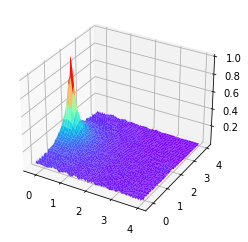

In [7]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')

X_g = rg.gpos[0,:].reshape(85,85)
Y_g = rg.gpos[1,:].reshape(85,85)
Z_g = B.reshape(85,85)

ax3.plot_surface(X_g,Y_g,Z_g,cmap='rainbow')
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow)   #等高线图，要设置offset，为Z的最小值
plt.show()